### 1.0 Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Loading the datasets

In [3]:
archivo_url = 'https://raw.githubusercontent.com/NgoQuocBao1010/Exercise-Correction/main/core/plank_model/train.csv'

archivo = 'train.csv'

ds = pd.read_csv(archivo)

ds

,label,nose_x,nose_y,nose_z,nose_v,left_shoulder_x,left_shoulder_y,left_shoulder_z,left_shoulder_v,right_shoulder_x,...,right_heel_z,right_heel_v,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_v,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_v
0,C,0.792141,0.585212,-0.067640,0.999518,0.682632,0.539670,0.270455,0.996880,0.688922,...,-0.077094,0.957863,0.098083,0.716431,0.186286,0.685353,0.084355,0.724885,-0.230562,0.952622
1,C,0.792153,0.585208,-0.067657,0.999518,0.682624,0.539675,0.270204,0.996868,0.688926,...,-0.075767,0.958398,0.098175,0.716389,0.188317,0.685743,0.084443,0.724854,-0.228939,0.952915
2,C,0.792160,0.585211,-0.067602,0.999519,0.682617,0.539684,0.270091,0.996864,0.688927,...,-0.075364,0.958592,0.098203,0.716382,0.188618,0.686022,0.084499,0.724839,-0.228520,0.952998
3,C,0.792171,0.585225,-0.067480,0.999520,0.682611,0.539690,0.270020,0.996866,0.688929,...,-0.074546,0.958883,0.098239,0.716374,0.190058,0.686536,0.084533,0.724826,-0.227477,0.953112
4,C,0.792179,0.585240,-0.067460,0.999522,0.682607,0.539697,0.269914,0.996867,0.688932,...,-0.074029,0.959184,0.098282,0.716365,0.191131,0.686611,0.084556,0.724814,-0.226812,0.953242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,H,0.686869,0.539877,0.026248,0.999214,0.686127,0.417011,0.160699,0.996643,0.712502,...,0.038186,0.964841,0.222027,0.581916,0.161242,0.449509,0.215568,0.605296,-0.018090,0.928651
28516,H,0.712149,0.544478,0.014878,0.999212,0.693965,0.417500,0.159935,0.996030,0.718311,...,0.057837,0.965207,0.225002,0.589805,0.194644,0.456460,0.215463,0.608492,-0.008770,0.931416
28517,H,0.735630,0.543294,0.007467,0.999246,0.695831,0.417349,0.155194,0.995723,0.720067,...,0.086010,0.966131,0.226601,0.598075,0.219305,0.470830,0.220079,0.614120,0.026265,0.934942
28518,H,0.775572,0.517579,0.012821,0.999378,0.704168,0.404210,0.162908,0.995909,0.730823,...,0.070911,0.967070,0.238810,0.610591,0.198591,0.496140,0.228907,0.625559,0.018591,0.938905


In [4]:
archivo_url1 = 'https://raw.githubusercontent.com/NgoQuocBao1010/Exercise-Correction/main/core/plank_model/test.csv'

archivo = 'test.csv'

ds_test = pd.read_csv(archivo)

ds_test

,label,nose_x,nose_y,nose_z,nose_v,left_shoulder_x,left_shoulder_y,left_shoulder_z,left_shoulder_v,right_shoulder_x,...,right_heel_z,right_heel_v,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_v,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_v
0,C,0.241842,0.435841,-0.002772,0.999881,0.274594,0.341100,-0.188556,0.999743,0.296270,...,0.174394,0.529667,0.801527,0.555134,-0.070554,0.776038,0.794738,0.537268,0.102899,0.440595
1,C,0.237662,0.440657,-0.003768,0.999896,0.274228,0.339355,-0.189618,0.999759,0.296200,...,0.184522,0.553936,0.803268,0.557891,-0.061299,0.799590,0.795147,0.533265,0.113687,0.479885
2,C,0.237591,0.441506,-0.003623,0.999899,0.274257,0.340742,-0.190390,0.999762,0.295690,...,0.187280,0.553449,0.803358,0.558061,-0.053722,0.798296,0.797029,0.534547,0.120511,0.478705
3,C,0.238127,0.441322,-0.000322,0.999902,0.274333,0.339990,-0.190143,0.999760,0.295731,...,0.178452,0.561389,0.803932,0.554631,-0.059433,0.804831,0.799963,0.532089,0.107540,0.488323
4,C,0.238066,0.440833,0.003989,0.999907,0.274171,0.343735,-0.187406,0.999760,0.295011,...,0.172571,0.567620,0.802851,0.554338,-0.064519,0.809826,0.799751,0.530627,0.102761,0.495874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,L,0.621629,0.818302,-0.022280,0.998947,0.550513,0.754882,0.165160,0.997455,0.562619,...,-0.020764,0.885343,0.148026,0.944999,0.123827,0.530060,0.135886,0.960246,-0.078458,0.851290
706,L,0.621083,0.816558,-0.020143,0.998789,0.550460,0.753877,0.159154,0.997850,0.562719,...,-0.018088,0.890916,0.149462,0.944748,0.121984,0.552188,0.135848,0.962524,-0.072994,0.860125
707,L,0.621027,0.819120,-0.020541,0.998756,0.550155,0.753512,0.158521,0.997903,0.562620,...,-0.018487,0.889277,0.147822,0.944346,0.122430,0.544777,0.135349,0.962560,-0.072319,0.855884
708,L,0.620299,0.822376,-0.018240,0.998739,0.549592,0.753327,0.159244,0.997982,0.562151,...,-0.024315,0.887612,0.146345,0.943867,0.118122,0.539854,0.133164,0.962829,-0.078480,0.851282


### 1.2 Dataset preprocessing
Replacing high back and low back with 2 and 1 respectively and correct with 0

In [5]:
ds_test['label'] = ds_test['label'].replace('H', 2)
ds_test['label'] = ds_test['label'].replace('L', 1)
ds_test['label'] = ds_test['label'].replace('C', 0)

/var/folders/rb/h3rl5sw15s587zkvrd3b6wy40000gn/T/ipykernel_8028/3704822922.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds_test['label'] = ds_test['label'].replace('C', 0)


In [6]:
ds['label'] = ds['label'].replace('H', 2)
ds['label'] = ds['label'].replace('L', 1)
ds['label'] = ds['label'].replace('C', 0)

/var/folders/rb/h3rl5sw15s587zkvrd3b6wy40000gn/T/ipykernel_8028/1111045380.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds['label'] = ds['label'].replace('C', 0)


### 1.3 Exploratory Data Analysis

In [7]:
ds.columns

Index(['label', 'nose_x', 'nose_y', 'nose_z', 'nose_v', 'left_shoulder_x',
       'left_shoulder_y', 'left_shoulder_z', 'left_shoulder_v',
       'right_shoulder_x', 'right_shoulder_y', 'right_shoulder_z',
       'right_shoulder_v', 'left_elbow_x', 'left_elbow_y', 'left_elbow_z',
       'left_elbow_v', 'right_elbow_x', 'right_elbow_y', 'right_elbow_z',
       'right_elbow_v', 'left_wrist_x', 'left_wrist_y', 'left_wrist_z',
       'left_wrist_v', 'right_wrist_x', 'right_wrist_y', 'right_wrist_z',
       'right_wrist_v', 'left_hip_x', 'left_hip_y', 'left_hip_z', 'left_hip_v',
       'right_hip_x', 'right_hip_y', 'right_hip_z', 'right_hip_v',
       'left_knee_x', 'left_knee_y', 'left_knee_z', 'left_knee_v',
       'right_knee_x', 'right_knee_y', 'right_knee_z', 'right_knee_v',
       'left_ankle_x', 'left_ankle_y', 'left_ankle_z', 'left_ankle_v',
       'right_ankle_x', 'right_ankle_y', 'right_ankle_z', 'right_ankle_v',
       'left_heel_x', 'left_heel_y', 'left_heel_z', 'left_heel_v',
 

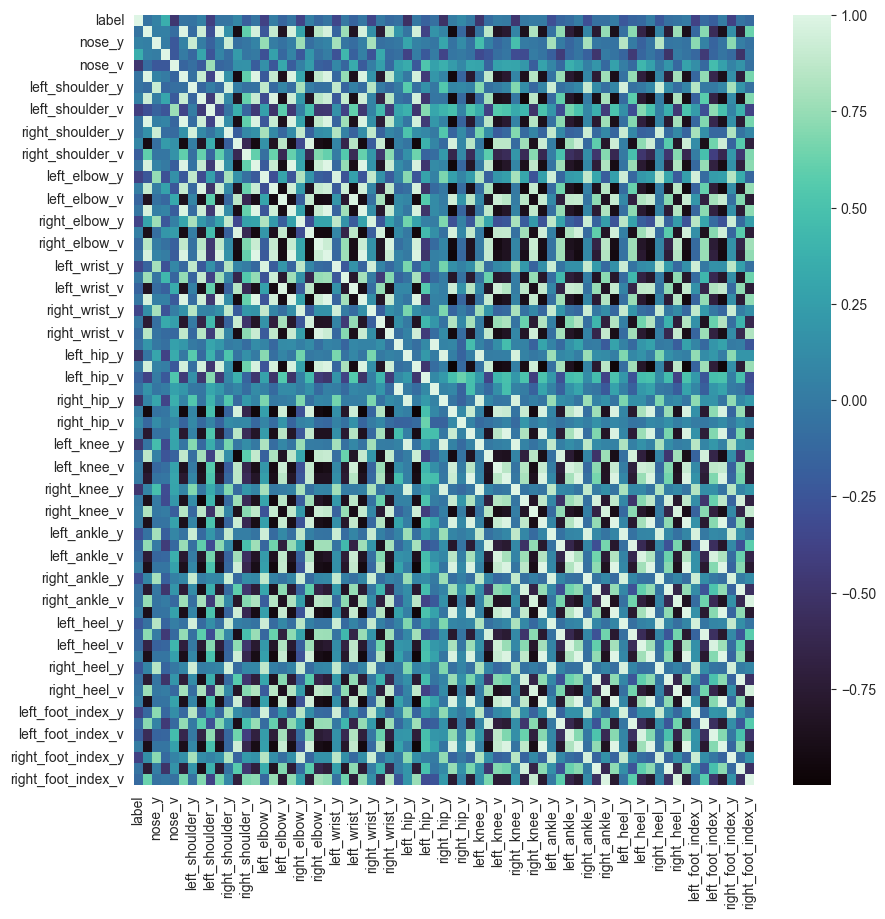

In [8]:
# dataset correlation matrix
cm = ds.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, ax=ax, cmap="mako")
plt.show()

In [9]:
ds["label"].value_counts()

label
0    9904
1    9546
2    9070
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='Count'>

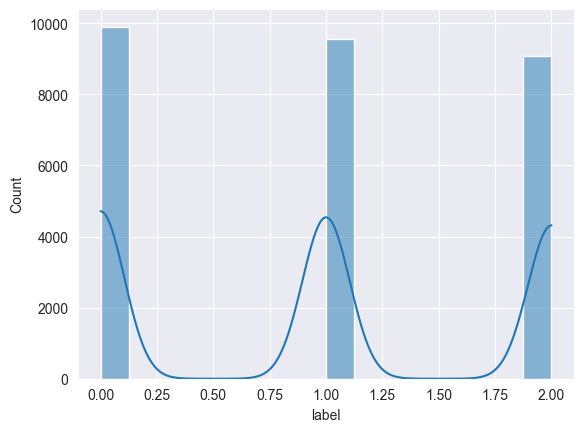

In [10]:
# plot the distribution of the target variable
sns.histplot(ds["label"], kde=True)

In [11]:
# sns.pairplot(ds, hue="label")

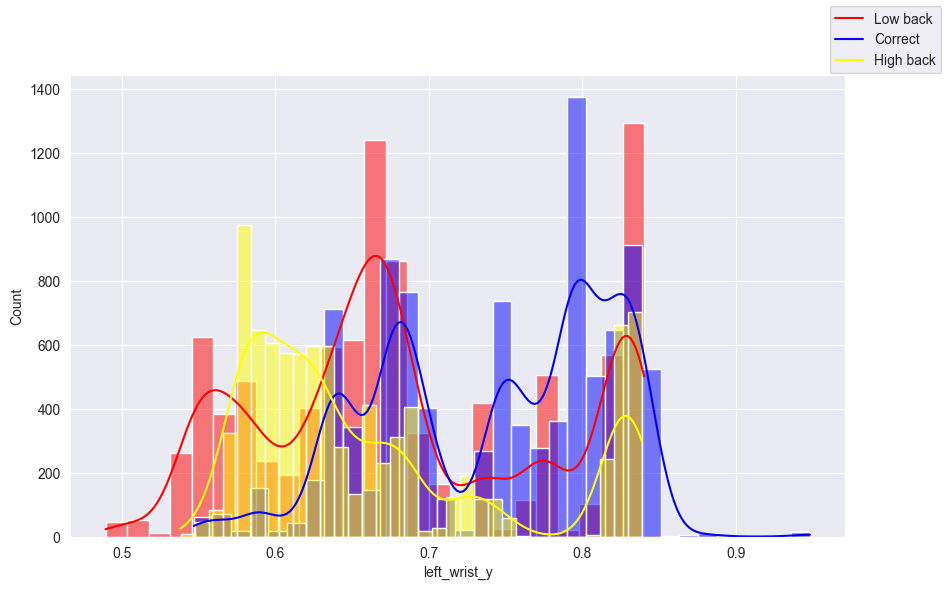

In [12]:
ds_true = ds[ds["label"] == 1]
ds_false = ds[ds["label"] == 0]
ds_two = ds[ds["label"] == 2]

fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(ds_true["left_wrist_y"], kde=True, color="red", ax=ax)
sns.histplot(ds_false["left_wrist_y"], kde=True, color="blue", ax=ax)
sns.histplot(ds_two["left_wrist_y"], kde=True, color="yellow", ax=ax)

fig.legend(labels=["Low back", "Correct", "High back"])

### 1.4 Data Modeling

In [13]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(ds.loc[:, ds.columns != 'label'], ds["label"].values.ravel())

/Users/defeee/Documents/GitHub/FormAI/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 1.5 Model Evaluation

In [14]:
# predict the target variable
y_pred = log_model.predict(ds_test.loc[:, ds_test.columns != 'label'])

Accuracy: 0.952112676056338


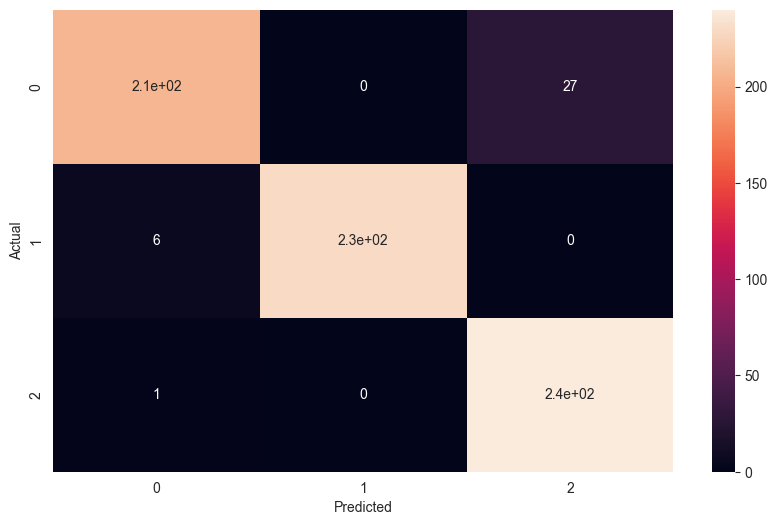

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# calculate the accuracy of the model

accuracy = accuracy_score(ds_test['label'], y_pred)
print("Accuracy:", accuracy)

# calculate the confusion matrix
cm = confusion_matrix(ds_test['label'], y_pred)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

In [16]:
from sklearn.metrics import classification_report

print(classification_report(ds_test['label'], y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       234
           1       1.00      0.97      0.99       235
           2       0.90      1.00      0.94       241

    accuracy                           0.95       710
   macro avg       0.96      0.95      0.95       710
weighted avg       0.95      0.95      0.95       710



### 1.6 Feature Scaling

Accuracy: 0.995774647887324


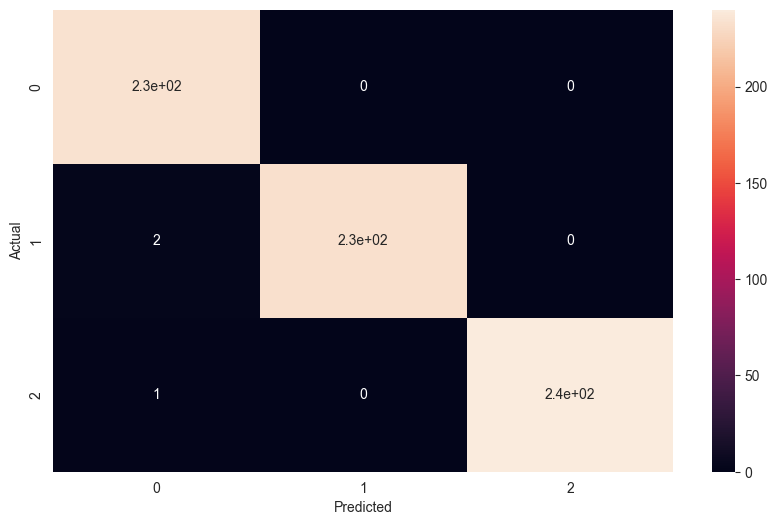

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ("scaler", StandardScaler()), 
    ("logistic", LogisticRegression())
])

pipe.fit(ds.loc[:, ds.columns != 'label'], ds['label'].values.ravel())

y_pred_scale = pipe.predict(ds_test.loc[:, ds_test.columns != 'label'])

accuracy = accuracy_score(ds_test['label'], y_pred_scale)
cm = confusion_matrix(ds_test['label'], y_pred_scale)

print("Accuracy:", accuracy)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

In [18]:
print("Coefficients:", log_model.coef_)
print("Intercept:", log_model.intercept_)

Coefficients: [[-1.08659005e+00 -2.16519368e+00 -2.64501688e+00 -1.45825707e+00
  -3.43650121e-01 -2.27999099e+00 -2.32097167e+00 -1.26605132e+00
   1.23598326e+00 -5.23316463e+00  6.07403837e-01 -1.61554290e+00
   2.74195593e-02  5.71971226e+00  3.48620963e-01  6.64404482e+00
   1.07944812e+00  2.95756275e+00  2.74587733e-01  5.80927773e+00
   2.53691421e-01  5.80084045e+00  1.78065942e+00  2.58382722e+00
   4.49447329e-01  2.78670346e+00  2.53676551e+00 -2.20501136e+00
   7.09350975e-02 -3.59385176e-01 -1.34099731e-01 -1.54154391e+00
   6.88892403e-01 -3.26849580e+00  1.43277097e-01 -1.60090972e+00
  -7.17969383e-01 -2.18079840e+00  5.30517852e-01 -4.72319604e+00
   2.00943537e-01 -3.39899557e+00  2.01007804e+00 -3.38186344e+00
  -2.56507068e-02 -3.14972336e-01  1.22560717e+00 -3.24264198e-01
  -8.24848926e-01 -7.80886870e-02  1.07548306e+00  1.56610329e+00
   6.98855517e-01  4.51256324e-01  1.08757689e+00 -2.47106582e+00
  -6.39182095e-01  7.51997696e-01  5.84432508e-01  1.59377888e

### 1.7 Feature Importance

<BarContainer object of 5 artists>

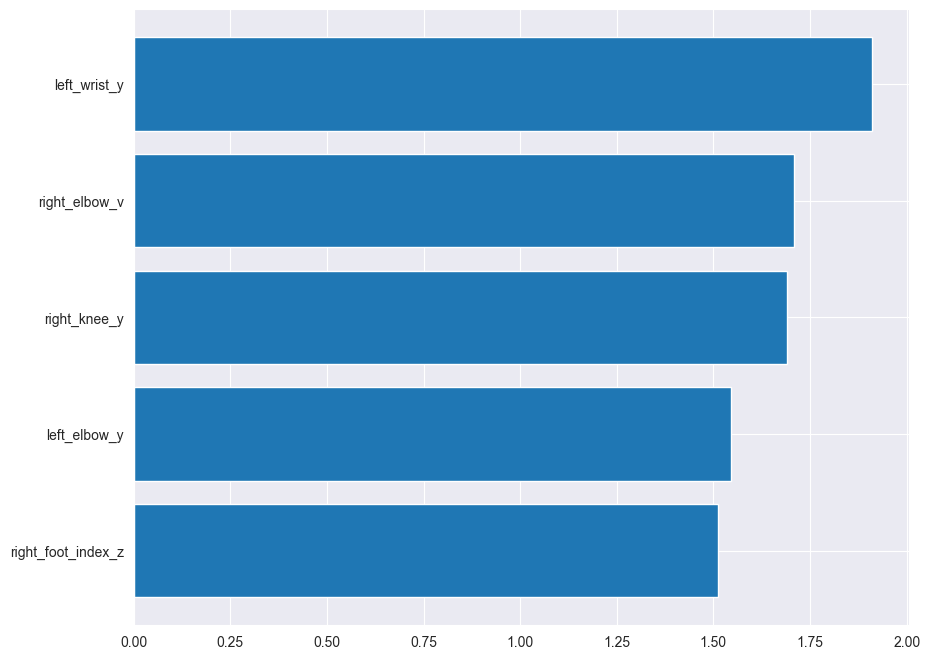

In [19]:
import numpy as np

fig, ax = plt.subplots(figsize=(10, 8))

feature_importances = pd.DataFrame(
    {"column": ds.loc[:, ds.columns != 'label'].columns, "coef": np.abs(pipe.named_steps["logistic"].coef_[0])}
).sort_values(by="coef", ascending=True).tail()

ax.barh(feature_importances["column"], feature_importances["coef"])

### 1.8 Hyperparameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "logistic__C": [0.1, 1, 10, 100, 1000],
    "logistic__penalty": ["l1", "l2"]
}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(ds.loc[:, ds.columns != 'label'], ds['label'].values.ravel())

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)



/Users/defeee/Documents/GitHub/FormAI/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/defeee/Documents/GitHub/FormAI/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/defeee/Documents/GitHub/FormAI/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/defeee/Documen

Best cross-validation score: 0.99
Best parameters:  {'logistic__C': 1, 'logistic__penalty': 'l2'}
